In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('911.csv')

In [4]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10-12-2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
columns_name=list(data.columns)

In [6]:
columns_name

['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e']

## DETERMINING THE CALL TYPES

In [7]:
def call_type_separator(x):
    x=x.split(':')
    return x[0]

In [8]:
data['call_type']=data['title'].apply(call_type_separator)

In [9]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 14:39,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10-12-2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [10]:
data.call_type.unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [11]:
data.call_type.value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: call_type, dtype: int64

## DATE AND TIME REGARDING THE CALLS

In [12]:
data.timeStamp=pd.to_datetime(data['timeStamp'], infer_datetime_format=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 10 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null datetime64[ns]
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
call_type    423909 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 32.3+ MB


In [14]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-10-12 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [15]:
import datetime as dt

In [16]:
data['year']=data['timeStamp'].dt.year
data['month']=data['timeStamp'].dt.month_name()
data['day']=data['timeStamp'].dt.day_name()
data['hour']=data['timeStamp'].dt.hour

In [17]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,year,month,day,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,October,Monday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,October,Monday,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,2015,October,Monday,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,October,Monday,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-10-12 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,October,Monday,16


#### SEPARATING THE EMERGANCY TYPE

In [18]:
def emergency_type_separator(x):
    x=x.split(':')
    return x[1]

In [19]:
data['emergency_type']=data['title'].apply(emergency_type_separator)

In [20]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,year,month,day,hour,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,October,Monday,17,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,October,Monday,17,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,2015,October,Monday,14,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,October,Monday,16,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-10-12 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,October,Monday,16,DIZZINESS


In [50]:
call_types=data.call_type.value_counts()

In [51]:
call_types

EMS        208676
Traffic    151458
Fire        63775
Name: call_type, dtype: int64

In [52]:
from decimal import Decimal

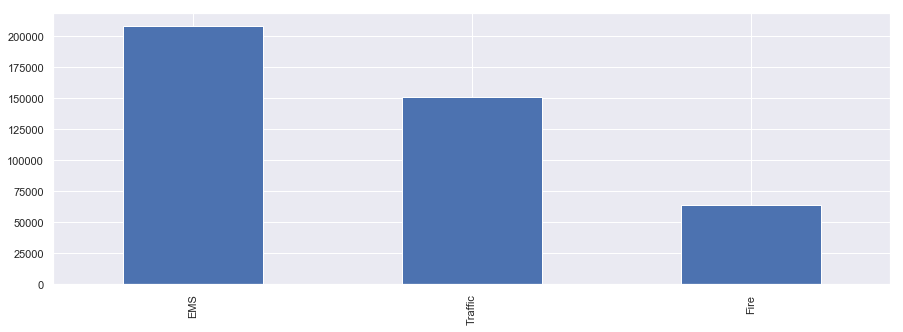

In [54]:
plt.figure(figsize=(15,5))
call_types.plot.bar()

## Visualize the percentage share of call type for each call?

### Percentage of different call type in different months

In [26]:
calls_data=data.groupby(['month','call_type'])['call_type'].count()

In [27]:
calls_data.head()

month   call_type
April   EMS          16982
        Fire          5118
        Traffic      11400
August  EMS          17847
        Fire          5441
Name: call_type, dtype: int64

In [28]:
calls_data_percentage = calls_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [29]:
calls_data_percentage.head()

month   call_type
April   EMS          51.0
        Fire         15.0
        Traffic      34.0
August  EMS          50.0
        Fire         15.0
Name: call_type, dtype: float64

In [30]:
font = {
    'size': 'x-large',
    'weight': 'bold'
}

In [31]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [32]:
calls_data_percentage = calls_data_percentage.reindex(month_order, level=0)

In [33]:
calls_data_percentage.head()

month     call_type
January   EMS          50.0
          Fire         14.0
          Traffic      36.0
February  EMS          47.0
          Fire         16.0
Name: call_type, dtype: float64

In [34]:
calls_data_percentage = calls_data_percentage.reindex(['EMS', 'Traffic', 'Fire'], level=1)

In [35]:
calls_data_percentage.head()

month     call_type
January   EMS          50.0
          Traffic      36.0
          Fire         14.0
February  EMS          47.0
          Traffic      37.0
Name: call_type, dtype: float64

In [36]:
import seaborn as sns

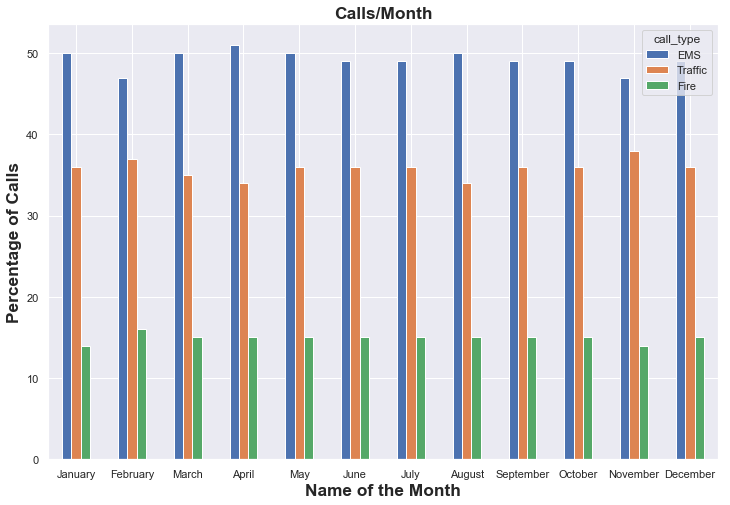

In [46]:
sns.set(rc={'figure.figsize':(12, 8)})
calls_data_percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the Month', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=0)
plt.title('Calls/Month', fontdict=font)
plt.savefig('Calls per Month.png')

### Percentage of different call type at different hours

In [38]:
hours_data = data.groupby(['hour', 'call_type'])['call_type'].count()

In [39]:
hours_data.head()

hour  call_type
0     EMS          5263
      Fire         1341
      Traffic      2046
1     EMS          4711
      Fire         1104
Name: call_type, dtype: int64

In [40]:
hours_data_percentage = hours_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [41]:
hours_data_percentage.head()

hour  call_type
0     EMS          61.0
      Fire         16.0
      Traffic      24.0
1     EMS          64.0
      Fire         15.0
Name: call_type, dtype: float64

In [42]:
hours_data_percentage = hours_data_percentage.reindex(['EMS', 'Traffic', 'Fire'], level=1)

In [43]:
hours_data_percentage.head()

hour  call_type
0     EMS          61.0
      Traffic      24.0
      Fire         16.0
1     EMS          64.0
      Traffic      21.0
Name: call_type, dtype: float64

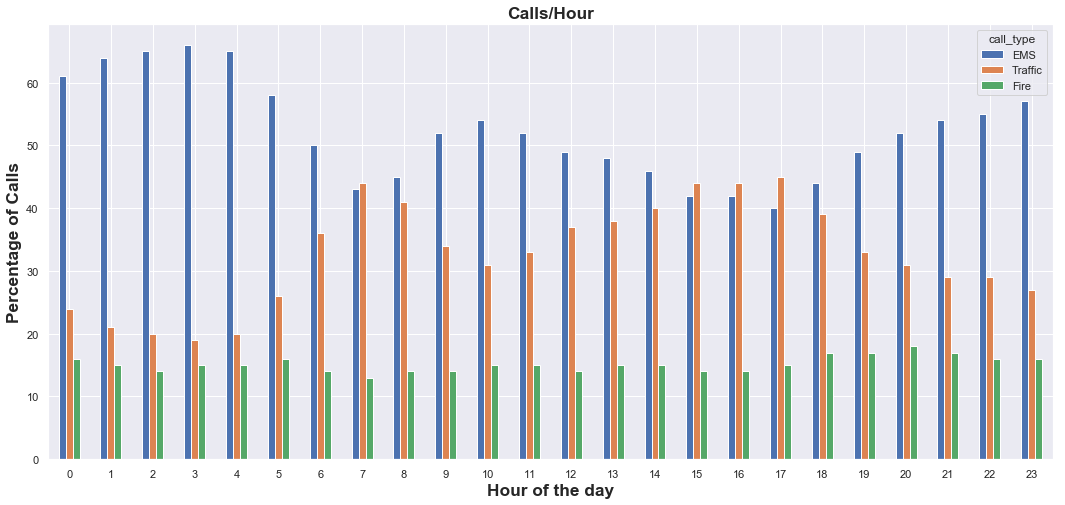

In [47]:
sns.set(rc={'figure.figsize':(18, 8)})
hours_data_percentage.unstack().plot(kind='bar')
plt.xlabel('Hour of the day', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=0)
plt.title('Calls/Hour', fontdict=font)
plt.savefig('Calls per Hour.png')

## EMS-DATA

In [107]:
ems_data = data[data['call_type'] == 'EMS']['emergency_type'].value_counts()[:8]

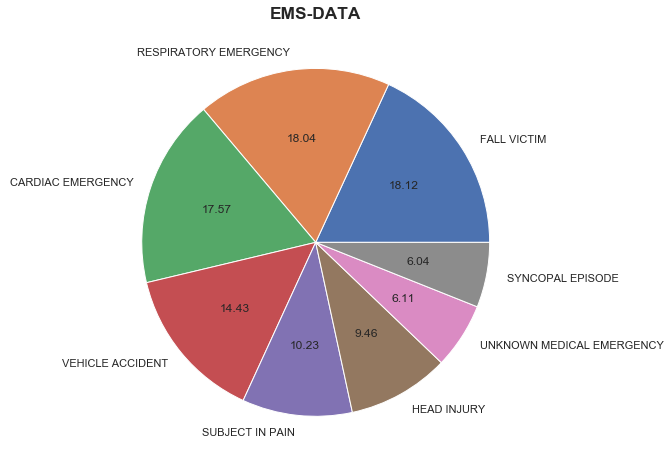

In [134]:
plt.pie(ems_data, labels=ems_data.index, autopct="%.2f")
plt.title('EMS-DATA',fontdict=font)
plt.savefig('EMS_data.png')

## Fire-Data

In [112]:
fire_data=data[data['call_type'] == 'Fire']['emergency_type'].value_counts()[:8]

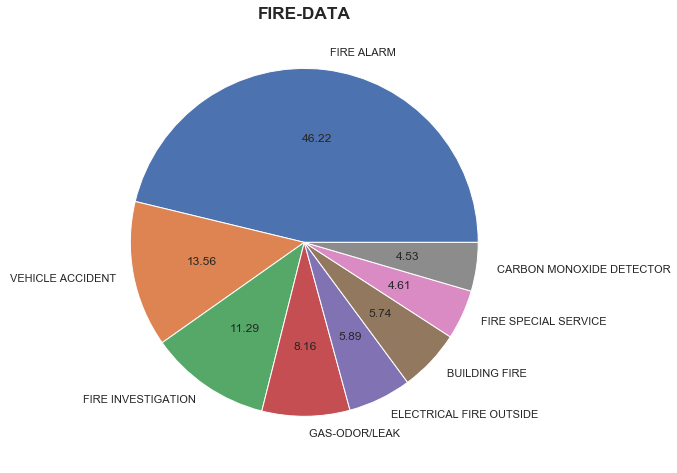

In [133]:
plt.pie(fire_data, labels=fire_data.index, autopct="%.2f")
plt.title('FIRE-DATA', fontdict=font)
plt.savefig('Fire_data.png')

## Traffic-Data

In [144]:
traffic_data=data[data['call_type'] == 'Traffic']['emergency_type'].value_counts()[:5]

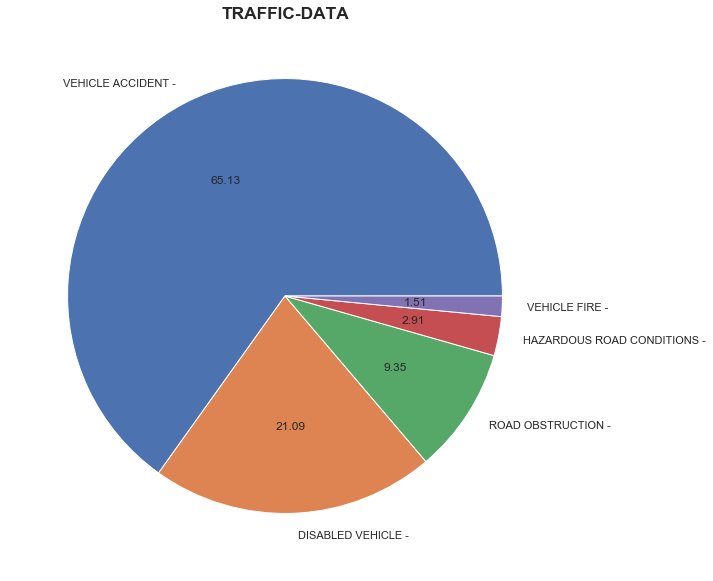

In [152]:
plt.pie(traffic_data, labels=traffic_data.index, autopct="%.2f")
plt.title('TRAFFIC-DATA', fontdict=font)
plt.savefig('Traffic_data.png')